In [184]:
## IMPORTING LIBRARIES:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

%matplotlib inline

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

## Importing Datasets

In [61]:
with open('t20_wc_match_results.json') as f:
    data = json.load(f) 
df_match = pd.DataFrame(data[0]['matchSummary'])
df_match.head(5)

,team1,team2,winner,margin,ground,matchDate,scorecard
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [62]:
with open('t20_wc_batting_summary.json') as f:
    data = json.load(f)
    
    all_records = []
    for rec in data:
        all_records.extend(rec['battingSummary'])
df_batting = pd.DataFrame(all_records)
df_batting.head(5)

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â€ Mendis b Karunaratne,20,12,1,2,166.66
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33


In [63]:
with open('t20_wc_bowling_summary.json') as f:
    data = json.load(f)
    
    all_records = []
    for rec in data:
        all_records.extend(rec['bowlingSummary'])
df_bowling = pd.DataFrame(all_records)
df_bowling.head(5)

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0


In [64]:
df_players = pd.read_json('t20_wc_player_info.json')
df_players.head(3)

,name,team,battingStyle,bowlingStyle,playingRole,description
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,


## Normalizing df_batting & df_bowling

In [65]:
df_match.rename({'scorecard': 'match_id'}, axis = 1, inplace = True)

### normalizing 'match' column to a new column  "match_id"

In [66]:
match_ids_dict = {}

for index, row in df_match.iterrows():
    key1 = row['team1'] + ' Vs ' + row['team2']
    key2 = row['team2'] + ' Vs ' + row['team1']
    
    match_ids_dict[key1] = row['match_id']
    match_ids_dict[key2] = row['match_id']

# match_ids_dict 

In [67]:
df_batting['match_id'] = df_batting['match'].map(match_ids_dict)
df_batting.head(3)

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â€ Mendis b Karunaratne,20,12,1,2,166.66,T20I # 1823


In [68]:
df_bowling['match_id'] = df_batting['match'].map(match_ids_dict)
df_bowling.head(3)

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0,T20I # 1823


### Adding out/not_out columns to df_batting 

In [69]:
df_batting['out/not_out'] = df_batting.dismissal.apply(lambda x: 'out' if len(x) > 0 else 'not_out')
df_batting.head()

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR,match_id,out/not_out
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00,T20I # 1823,out
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00,T20I # 1823,out
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â€ Mendis b Karunaratne,20,12,1,2,166.66,T20I # 1823,out
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33,T20I # 1823,out
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33,T20I # 1823,out


### Removing Special Characters

In [70]:
df_batting['batsmanName'] = df_batting['batsmanName'].apply(lambda x: x.replace('â€', ''))
df_batting['batsmanName'] = df_batting['batsmanName'].apply(lambda x: x.replace('\xa0', ''))
df_batting['batsmanName'] = df_batting['batsmanName'].apply(lambda x: x.replace('✝', ''))

df_batting['dismissal'] = df_batting['dismissal'].apply(lambda x: x.replace('â€', ''))
df_batting['dismissal'] = df_batting['dismissal'].apply(lambda x: x.replace('\xa0', ''))
df_batting['dismissal'] = df_batting['dismissal'].apply(lambda x: x.replace('✝', ''))


df_bowling['bowlerName'] = df_bowling['bowlerName'].apply(lambda x: x.replace('â€', ''))
df_bowling['bowlerName'] = df_bowling['bowlerName'].apply(lambda x: x.replace('\xa0', ''))
df_bowling['bowlerName'] = df_bowling['bowlerName'].apply(lambda x: x.replace('✝', ''))

### Converting  Numerical columns in  df_batting from String to Integers

##### Converting records with '-' AS df_batting[SR] TO 0:

In [71]:
df_batting['SR'] = df_batting['SR'].apply(lambda x: 0 if x == '-' else x)

In [72]:
df_batting['runs'] = df_batting['runs'].astype(int)
df_batting['balls'] = df_batting['balls'].astype(int)
df_batting['4s'] = df_batting['4s'].astype(int)
df_batting['6s'] = df_batting['6s'].astype(int)
df_batting['SR'] = df_batting['SR'].astype(float)

### Converting  Numerical columns in df_bowling from String to Integers

In [73]:
df_bowling['overs'] = df_bowling['overs'].astype(float)
df_bowling['maiden'] = df_bowling['maiden'].astype(int)
df_bowling['runs'] = df_bowling['runs'].astype(int)
df_bowling['wickets'] = df_bowling['wickets'].astype(int)
df_bowling['economy'] = df_bowling['economy'].astype(float)
df_bowling['0s'] = df_bowling['0s'].astype(int)
df_bowling['4s'] = df_bowling['4s'].astype(int)
df_bowling['6s'] = df_bowling['6s'].astype(int)
df_bowling['wides'] = df_bowling['wides'].astype(int)
df_bowling['noBalls'] = df_bowling['noBalls'].astype(int)

### Export datasets to CSV files for PowerBI

### Renaming to "Team" Columns in df_batting & df_bowling

In [74]:
df_batting['Team'] = df_batting['teamInnings']  
df_bowling['Team'] = df_bowling['bowlingTeam']

df_batting = df_batting.drop(['teamInnings'], axis=1)
df_bowling = df_bowling.drop(['bowlingTeam'], axis=1)

### Converting Dates to "datetime" Format in df_match

In [75]:
df_match['matchDate'] = pd.to_datetime(df_match['matchDate'])

### Adding a new Column  - Stage to df_match

In [76]:
df_match['stage'] = df_match['matchDate'].apply(lambda x: 'Qualifier' if x < pd.Timestamp(2022, 10, 22, 0) else 'stage 12')

### Renaming Columns - 'batsmanName' & 'bowlerName' to 'batsman' & 'bowler':

In [77]:
df_batting['batsman'] = df_batting['batsmanName']  
df_bowling['bowler'] = df_bowling['bowlerName']

df_batting = df_batting.drop(['batsmanName'], axis=1)
df_bowling = df_bowling.drop(['bowlerName'], axis=1)

### Adding Boundaries Column to df_batting

In [78]:
df_batting['boundaries'] =  df_batting['4s']*4 + df_batting['6s']*6

# INSIGHTS

### 1) Highest Score by a Batsman

In [79]:
df_batting[['batsman', 'match', 'runs']].sort_values(by = 'runs', ascending = False).head(1)

,batsman,match,runs
329,Rilee Rossouw,South Africa Vs Bangladesh,109


### 2) Highest Srike Rate by a Batsman

In [80]:
df_batting.sort_values(by = 'SR', ascending = False).head(1)

,match,battingPos,dismissal,runs,balls,4s,6s,SR,match_id,out/not_out,Team,batsman,boundaries
626,Netherlands Vs South Africa,10,,4,1,1,0,400.0,T20I # 1871,not_out,South Africa,Anrich Nortje,4


### 3) Batsman with Highest runs 

In [81]:
df_batting.groupby('batsman')[['runs']].sum('runs').sort_values(by = 'runs', ascending = False).head(1)

,runs
batsman,
Virat Kohli,296


### 4) Bowler with Highest Wickets 

In [225]:
df_bowling.groupby('bowler')[['wickets']].sum('wickets').sort_values(by = 'wickets', ascending = False).head(3)

,wickets
bowler,
Wanindu Hasaranga de Silva,15
Bas de Leede,13
Sam Curran,13


### 5) Best Batting Figures

In [83]:
df_batting.sort_values(by = ['runs', 'SR'], ascending = [False, False]).head(10)

,match,battingPos,dismissal,runs,balls,4s,6s,SR,match_id,out/not_out,Team,batsman,boundaries
329,South Africa Vs Bangladesh,3,c Litton Das b Shakib Al Hasan,109,56,7,8,194.64,T20I # 1847,out,South Africa,Rilee Rossouw,76
382,New Zealand Vs Sri Lanka,4,c Shanaka b Kumara,104,64,10,4,162.50,T20I # 1850,out,New Zealand,Glenn Phillips,64
203,New Zealand Vs Australia,2,,92,58,7,2,158.62,T20I # 1839,not_out,New Zealand,Devon Conway,40
681,India Vs England,2,,86,47,4,7,182.97,T20I # 1878,not_out,England,Alex Hales,58
112,Scotland Vs Ireland,2,c Adair b Little,86,55,6,4,156.36,T20I # 1833,out,Scotland,Michael Jones,48
60,Zimbabwe Vs Ireland,5,b Adair,82,48,5,5,170.83,T20I # 1828,out,Zimbabwe,Sikandar Raza,50
261,Pakistan Vs India,3,,82,53,6,4,154.71,T20I # 1842,not_out,India,Virat Kohli,48
680,India Vs England,1,,80,49,9,3,163.26,T20I # 1878,not_out,England,Jos Buttler(c),54
144,Sri Lanka Vs Netherlands,2,c sub (LV van Beek) b van der Gugten,79,44,5,5,179.54,T20I # 1835,out,Sri Lanka,Kusal Mendis,50
90,Sri Lanka Vs U.A.E.,1,c Basil Hameed b Zahoor Khan,74,60,6,2,123.33,T20I # 1832,out,Sri Lanka,Pathum Nissanka,36


### 6) Best Bowling Figures

In [84]:
df_bowling[df_bowling['overs'] >= 3].sort_values(by = ['economy', 'wickets'], ascending = [True, False]).head(10)

,match,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id,Team,bowler
72,Sri Lanka Vs U.A.E.,4.0,1,8,3,2.00,17,0,0,0,0,T20I # 1828,Sri Lanka,Wanindu Hasaranga de Silva
431,Netherlands Vs South Africa,4.0,0,10,1,2.50,14,0,0,0,0,T20I # 1852,South Africa,Anrich Nortje
161,Afghanistan Vs England,3.4,0,10,5,2.72,16,1,0,1,0,T20I # 1835,England,Sam Curran
21,U.A.E. Vs Netherlands,4.0,0,11,1,2.75,14,0,0,0,0,T20I # 1825,U.A.E.,Zahoor Khan
299,Netherlands Vs Pakistan,4.0,0,11,1,2.75,15,0,0,0,0,T20I # 1845,Pakistan,Naseem Shah
248,South Africa Vs Bangladesh,3.3,0,10,4,2.85,16,1,0,0,0,T20I # 1841,South Africa,Anrich Nortje
30,Scotland Vs West Indies,4.0,0,12,3,3.00,16,1,0,1,0,T20I # 1825,Scotland,Mark Watt
490,Pakistan Vs England,4.0,0,12,3,3.00,15,0,0,0,0,T20I # 1858,England,Sam Curran
257,India Vs Netherlands,3.0,2,9,2,3.00,14,1,0,0,0,T20I # 1842,India,Bhuvneshwar Kumar
266,Zimbabwe Vs Pakistan,4.0,1,12,1,3.00,15,0,0,0,0,T20I # 1842,Pakistan,Haris Rauf


### 7) Batsmen with highest boundary Runs 

In [85]:
df_batting.groupby('batsman')[['4s', '6s', 'SR','boundaries']].sum('boundaries').sort_values(by = ['boundaries', 'SR'], ascending = [False, False]).head(5)

,4s,6s,SR,boundaries
batsman,,,,
Suryakumar Yadav,26,9,1095.50,158
Virat Kohli,25,8,779.15,148
Jos Buttler(c),24,7,693.24,138
Max O'Dowd,22,8,887.43,136
Alex Hales,19,10,754.63,136


### 8) Most Expensive Bowlers 

In [86]:
df_temp = pd.DataFrame()
df_temp['avg_runs_per_over'] = df_bowling['runs']/df_bowling['overs']
df_temp['bowler'] = df_bowling['bowler']

expensive_bowlers = df_temp.groupby('bowler')[['avg_runs_per_over']].mean('avg_runs_per_over').sort_values(by = 'avg_runs_per_over', ascending = False)
expensive_bowlers.head(5)

,avg_runs_per_over
bowler,
Iftikhar Ahmed,15.50
Kyle Mayers,14.50
Shoriful Islam,14.25
Mitchell Marsh,14.00
Kane Richardson,12.00


### 9) Bowlers wickets per over

In [87]:
df_temp1 = pd.DataFrame()
df_temp1['wickets_per_over'] = df_bowling['wickets']/df_bowling['overs']
df_temp1['bowler'] = df_bowling['bowler']

wickets_per_over = df_temp1.groupby('bowler')[['wickets_per_over']].mean('wickets_per_over').sort_values(by = 'wickets_per_over', ascending = False)
wickets_per_over.head(10)

,wickets_per_over
bowler,
Afif Hossain,1.000000
Glenn Maxwell,0.976190
Brandon Glover,0.933333
Naveen-ul-Haq,0.750000
Mark Wood,0.645833
Anrich Nortje,0.642424
Chris Jordan,0.625000
Sam Curran,0.606209
Bas de Leede,0.595238


### 10) India's Win Ratio in Melbourne Ground

In [88]:
df_india_matches = df_match[(df_match['team1'] == 'India') | (df_match['team2'] == 'India')]

In [89]:
df_india_melbourne = df_india_matches[df_india_matches['ground'] == 'Melbourne']
df_india_melbourne

,team1,team2,winner,margin,ground,matchDate,match_id,stage
15,India,Pakistan,India,4 wickets,Melbourne,2022-10-23,T20I # 1842,stage 12
41,India,Zimbabwe,India,71 runs,Melbourne,2022-11-06,T20I # 1873,stage 12


In [90]:
df_india_matches

,team1,team2,winner,margin,ground,matchDate,match_id,stage
15,India,Pakistan,India,4 wickets,Melbourne,2022-10-23,T20I # 1842,stage 12
22,India,Netherlands,India,56 runs,Sydney,2022-10-27,T20I # 1848,stage 12
29,India,South Africa,South Africa,5 wickets,Perth,2022-10-30,T20I # 1853,stage 12
34,Bangladesh,India,India,5 runs,Adelaide,2022-11-02,T20I # 1860,stage 12
41,India,Zimbabwe,India,71 runs,Melbourne,2022-11-06,T20I # 1873,stage 12
43,England,India,England,10 wickets,Adelaide,2022-11-10,T20I # 1878,stage 12


In [91]:
def win_percentage(df, team):
    count = 0
    for index, rows in df.iterrows():
        if rows['winner'] == team:
            count += 1
            
    print("Win Ratio is: ", count/len(df. index) * 100, '%')

In [92]:
print("India's Win ratio in Melbourne Ground:")
win_percentage(df_india_melbourne, 'India')

India's Win ratio in Melbourne Ground:
Win Ratio is:  100.0 %


### 11) India's Win Ratio  in the Torunament

In [93]:
print("Team India's win percentage in the Tournament")
win_percentage(df_india_matches, 'India') 

Team India's win percentage in the Tournament
Win Ratio is:  66.66666666666666 %


### 12) Average Stats of a Batsman in 2nd Position

In [328]:
df_2pos = df_batting[df_batting['battingPos'] == 2]
df_2pos.groupby('battingPos')[['runs', 'SR', '4s', '6s']].mean('runs')

,runs,SR,4s,6s
battingPos,,,,
2,22.238095,99.429762,1.952381,0.785714


## Analysing Dismissals

### Creating a DF for Dismissals

In [329]:
df_dismissal = pd.DataFrame()
df_dismissal[['batsman', 'dismissal', 'out/not_out', 'match_id']] = df_batting[['batsman', 'dismissal', 'out/not_out', 'match_id']]
df_dismissal = df_dismissal.loc[df_dismissal['out/not_out'] == 'out']
df_dismissal.head(3)

,batsman,dismissal,out/not_out,match_id
0,Michael van Lingen,c Pramod Madushan b Chameera,out,T20I # 1823
1,Divan la Cock,c Shanaka b Pramod Madushan,out,T20I # 1823
2,Jan Nicol Loftie-Eaton,c Mendis b Karunaratne,out,T20I # 1823


In [330]:
df_batting.columns

Index(['match', 'battingPos', 'dismissal', 'runs', 'balls', '4s', '6s', 'SR',
       'match_id', 'out/not_out', 'Team', 'batsman', 'boundaries'],
      dtype='object')

### Adding Type of Dismissal column and filling values:

In [331]:
df_dismissal['dismissal_type'] = ''

def dismissal_type():
    for index, row in df_dismissal.iterrows():
        if row['dismissal'][0:2] == 'c ':
            row['dismissal_type'] = 'caught out'
        elif row['dismissal'][0:7] == 'run out':
            row['dismissal_type'] = 'run out'
        elif row['dismissal'][0:4] == 'lbw ':
            row['dismissal_type'] = 'lbw'
        elif row['dismissal'][0:3] == 'st ':
            row['dismissal_type'] = 'stumped'
        else:
            row['dismissal_type'] = 'bowled'
dismissal_type()

### Adding Bowler, Caught-by, Stumped-by columns and filling values:

In [332]:
df_dismissal['bowler'] = ''
df_dismissal['caught_by'] = ''
df_dismissal['stumped_by'] = ''

def bowler():
    for index, row in df_dismissal.iterrows():
        if row['dismissal_type'] == 'caught out':
            row['bowler'] = row['dismissal'].split('b ')[1]
            row['caught_by'] = row['dismissal'].split('b ')[0][2:]
        elif row['dismissal_type'] == 'run out':
            row['bowler'] = np.nan 
        elif row['dismissal_type'] == 'lbw':
            row['bowler'] = row['dismissal'].split('b ')[1]
        elif row['dismissal_type'] == 'stumped':
            row['bowler'] = row['dismissal'].split('b ')[1][3:]
            row['stumped_by'] = row['dismissal'].split('b ')[0]
        else:
            row['bowler'] = row['dismissal'].split('b ')[1]
bowler()

### 13)  Analysing a Batsman's dismissals

Text(0.5, 1.0, "Sean Williams' wicket losses")

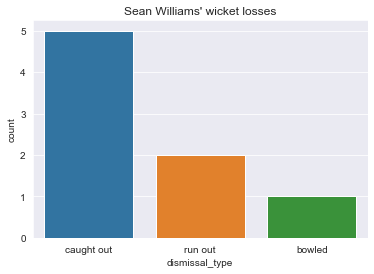

In [333]:
df_sw = df_dismissal.loc[df_dismissal['batsman'] == 'Sean Williams']

sns.countplot(x = 'dismissal_type',data = df_sw).set_title("Sean Williams' wicket losses")

### 14) Analysing Bowler's wickets

Text(0.5, 1.0, "PWH de Silva's Dismissals")

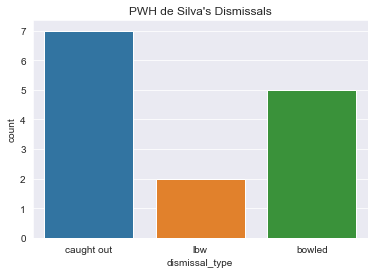

In [334]:
df_whds =  df_dismissal[df_dismissal['bowler'] == 'PWH de Silva']
df_whds

sns.countplot(x = 'dismissal_type',data = df_whds).set_title("PWH de Silva's Dismissals")

### 15) Most Run Outs

In [335]:
df_run_out = df_dismissal[df_dismissal['dismissal_type'] == 'run out']
df_most_run_outs = df_run_out.groupby('batsman')[['dismissal_type']].count().sort_values(by = 'dismissal_type', ascending = False).head(5)
df_most_run_outs

,dismissal_type
batsman,
Paul van Meekeren,2
Max O'Dowd,2
Sean Williams,2
Gulbadin Naib,2
Akeal Hosein,1


[Text(0, 0.5, 'Number of Run Outs'),
 Text(0.5, 1.0, 'Most Run Outs as a Batsman')]

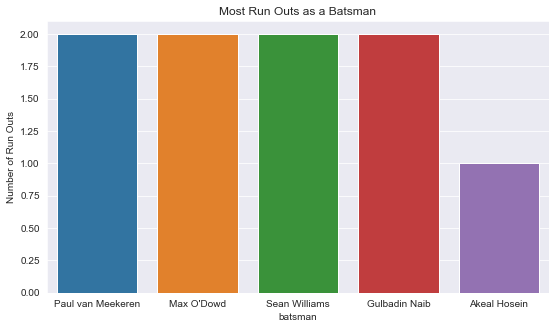

In [336]:
plt.figure(figsize=(9,5))
sns.set_style('darkgrid')

sns.barplot(x= df_most_run_outs.index ,y='dismissal_type', data = df_most_run_outs).set(ylabel='Number of Run Outs', title = 'Most Run Outs as a Batsman')

### 16) Highest Catches

In [337]:
df_catches = df_dismissal[df_dismissal['dismissal_type'] == 'caught out']
df_most_catches = df_catches.groupby('caught_by')[['dismissal_type']].count().sort_values(by = 'dismissal_type', ascending = False).head(5)
df_most_catches

,dismissal_type
caught_by,
&,15
su,10
Shanaka,9
Buttler,9
Edwards,9


##  Ground - Insights

In [344]:
df_match_batting = df_batting.merge(df_match, on = 'match_id', how = 'inner')
df_match_bowling = df_bowling.merge(df_match, on = 'match_id', how = 'inner')

### 17) Rilee Rossouw's Average Performance in different Grounds

<AxesSubplot:xlabel='ground', ylabel='runs'>

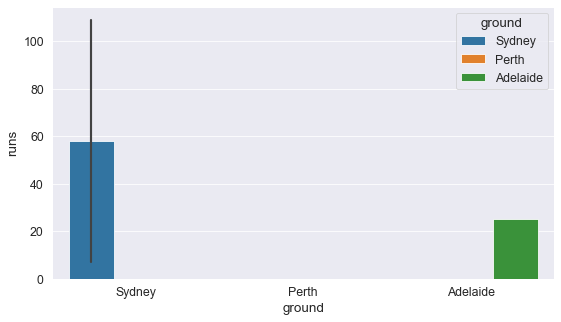

In [365]:
df_rr = df_match_batting[df_match_batting['batsman'] == 'Rilee Rossouw']
rr_avg = df_rr.groupby('ground')[['runs', 'SR']].mean()

plt.figure(figsize=(9,5))
sns.set_style('darkgrid')
sns.barplot(x='ground',y='runs',data=df_rr, hue='ground')


### 17) 6s in different Grounds

<AxesSubplot:xlabel='ground', ylabel='6s'>

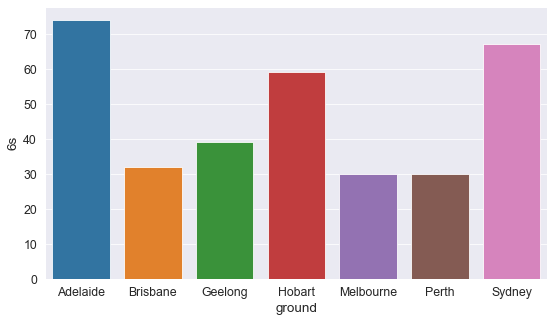

In [383]:
df_sixes_grounds = df_match_batting.groupby('ground')[['6s']].sum('6s')
df_sixes_grounds

plt.figure(figsize=(9,5))
sns.barplot(x = df_sixes_grounds.index, y='6s', data=df_sixes_grounds)